<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_02_08_2021/notebooks/week_3_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Tasks:

Hourly arrival data from week-1: https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/customers_per_hour.csv

Description: https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/customers_per_hour_desc.txt

#Task-1:

In [479]:
import pandas as pd

In [480]:
data = pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/customers_per_hour.csv')

In [481]:
# Counti: Total number of customers who made a transaction between (i-1):00:00 (Inclusive) and i:00:00 (Exclusive) on a given date.
data

,Date,Count1,Count2,Count3,Count4,Count5,Count6,Count7,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Count22,Count23,Count24
0,2010-12-01,0,0,0,0,0,0,0,0,3,12,9,11,20,12,7,11,9,4,0,0,0,0,0,0
1,2010-12-02,0,0,0,0,0,0,0,2,3,5,10,9,14,11,7,13,10,9,9,2,0,0,0,0
2,2010-12-03,0,0,0,0,0,0,0,0,0,5,6,4,9,6,9,6,3,2,0,0,0,0,0,0
3,2010-12-05,0,0,0,0,0,0,0,0,0,0,8,13,17,16,7,14,4,0,0,0,0,0,0,0
4,2010-12-06,0,0,0,0,0,0,0,0,2,4,11,12,19,13,8,12,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,0,0,0,0,0,0,0,0,3,5,9,9,18,16,16,11,15,6,0,0,0,0,0,0
301,2011-12-06,0,0,0,0,0,0,0,0,4,6,9,17,25,10,14,8,6,6,0,0,0,0,0,0
302,2011-12-07,0,0,0,0,0,0,0,0,7,7,8,12,20,12,9,11,5,4,0,0,0,0,0,0
303,2011-12-08,0,0,0,0,0,0,0,0,1,9,7,12,19,14,7,14,6,5,7,5,1,0,0,0


In [482]:
data['Date'] = pd.to_datetime(data['Date'])

In [483]:
data.drop(data[data.Date.dt.isocalendar().year==2010].index,inplace=True)

In [484]:
all_dates=data['Date']
all_weekNumber=all_dates.apply(lambda x: (x+pd.Timedelta(days=1)).week)
all_weekNumber=pd.DataFrame(all_weekNumber).drop_duplicates()
all_weekNumber.columns=['week']
all_weekNumber.set_index('week',inplace=True)

In [485]:
all_weekNumber[['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]=0
for date in all_dates:
  all_weekNumber.loc[all_weekNumber.index==(date+pd.Timedelta(days=1)).week,date.day_name()]=1

In [486]:
all_weekNumber.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64', name='week')

In [487]:
Q1_weeks=all_weekNumber[0:13]
Q2_weeks=all_weekNumber[13:26]
Q3_weeks=all_weekNumber[26:39]
Q4_weeks=all_weekNumber[39:]

In [488]:
Q1_weeks

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
week,,,,,,,
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [489]:
#weekNumber.to_csv('weekly_missing_days.csv',index=False)

In [490]:
#weekly_missing_days=pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/weekly_missing_days.csv')

In [491]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Heatmap for Weekly Data for Quarter-1')

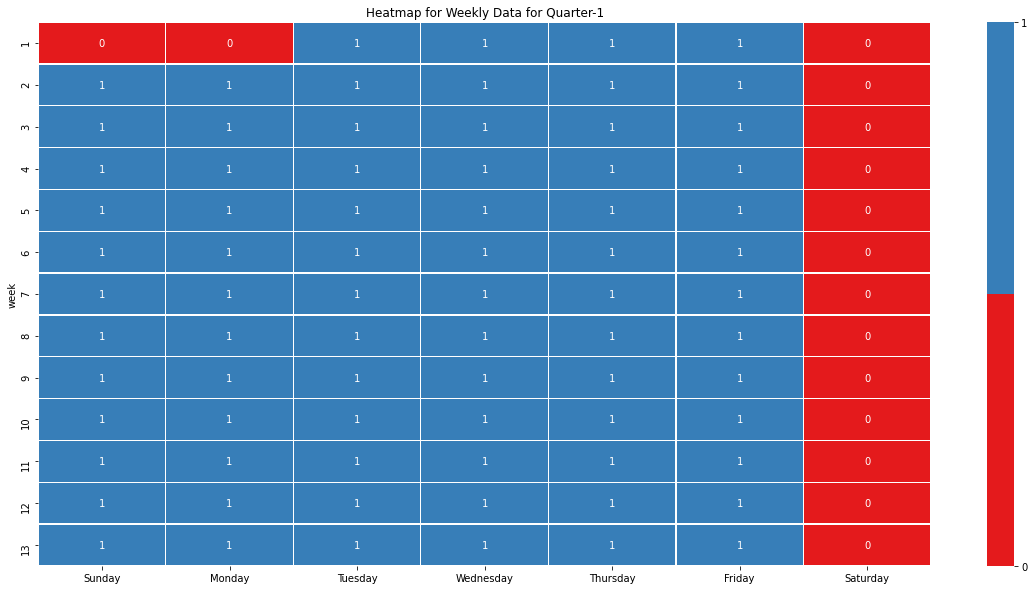

In [492]:
plt.figure(figsize=(20,10))
sns.heatmap(Q1_weeks,annot=True,linewidths=.3,cmap = sns.mpl_palette('Set1', 2),cbar_kws={'ticks':[0,1]})
plt.title('Heatmap for Weekly Data for Quarter-1')

Text(0.5, 1.0, 'Heatmap for Weekly Data for Quarter-2')

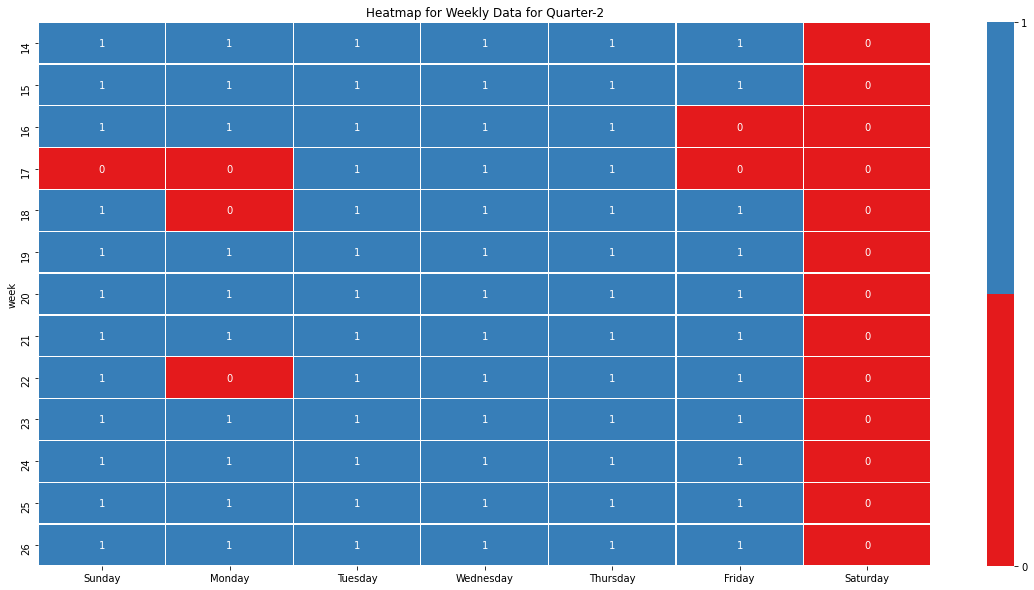

In [493]:
plt.figure(figsize=(20,10))
sns.heatmap(Q2_weeks,annot=True,linewidths=.3,cmap = sns.mpl_palette('Set1', 2),cbar_kws={'ticks':[0,1]})
plt.title('Heatmap for Weekly Data for Quarter-2')

Text(0.5, 1.0, 'Heatmap for Weekly Data for Quarter-3')

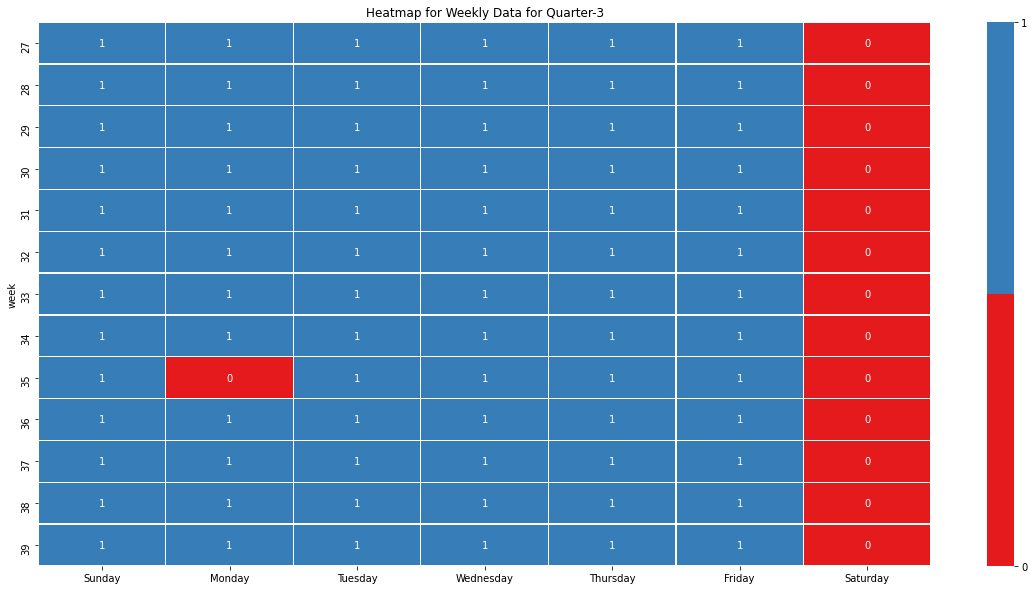

In [494]:
plt.figure(figsize=(20,10))
sns.heatmap(Q3_weeks,annot=True,linewidths=.3,cmap = sns.mpl_palette('Set1', 2),cbar_kws={'ticks':[0,1]})
plt.title('Heatmap for Weekly Data for Quarter-3')

Text(0.5, 1.0, 'Heatmap for Weekly Data for Quarter-4')

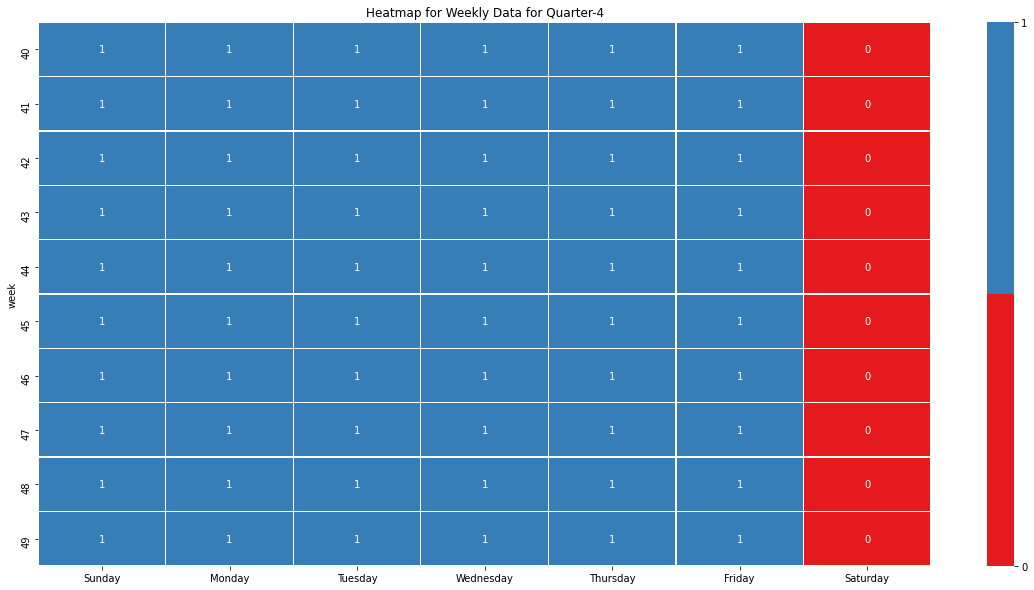

In [495]:
plt.figure(figsize=(20,10))
sns.heatmap(Q4_weeks,annot=True,linewidths=.3,cmap = sns.mpl_palette('Set1', 2),cbar_kws={'ticks':[0,1]})
plt.title('Heatmap for Weekly Data for Quarter-4')

Text(0.5, 1.0, 'Heatmap for Weekly Data')

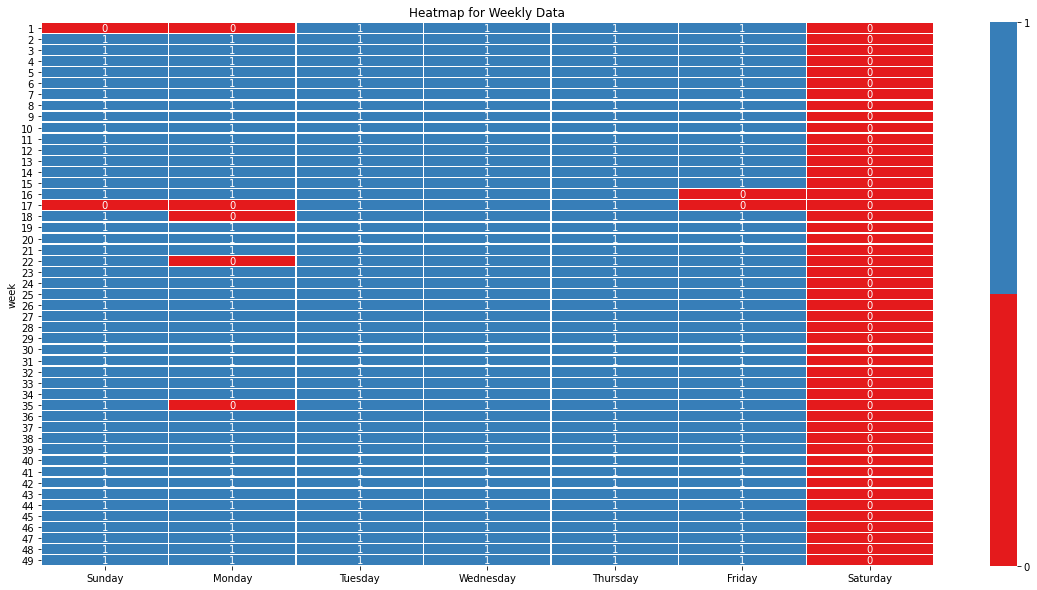

In [496]:
plt.figure(figsize=(20,10))
sns.heatmap(all_weekNumber,annot=True,linewidths=.3,cmap = sns.mpl_palette('Set1', 2),cbar_kws={'ticks':[0,1]})
plt.title('Heatmap for Weekly Data')

# Task 3: Identifying types of missing data
- Saturday
- Other days

All Saturdays are missing. There may be some reason such as- the store is closed on every Saturday. So, we can assume that the missing type is 'Missing Not at Random' or **MNAR**.

- Non Saturday-

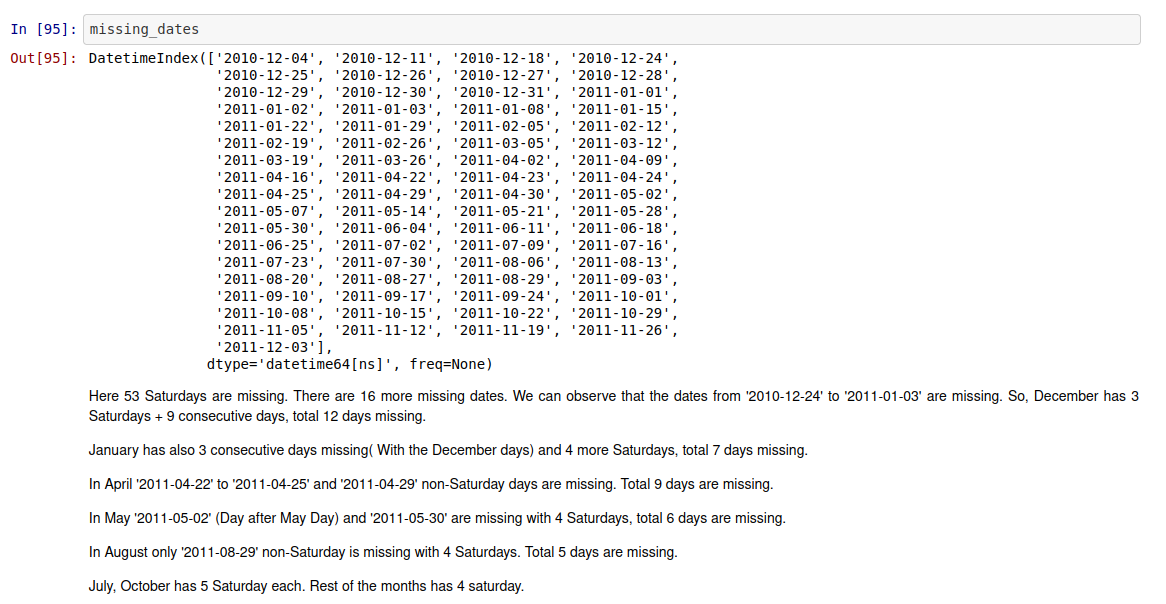

This screenshot is taken from week-2 tasks-  https://github.com/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_02_08_2021/notebooks/week_2_tasks.ipynb

There may be various reasons why these data are missing. It may be because of the holidays. Or store may have some maintenance. It may be very less likely that store was open and there was no transaction on any of the days, still may be a reason. So, we can say that the missing type is 'Missing at Random' or **MAR**.